In [1]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163755 sha256=654873620b3c59880128961de4b39c8fa17e1112a06541916010a501f556c0b2
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [4]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNBasic, KNNBaseline
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [5]:
#Load Movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [6]:
#Variables for algorithms
algo_svd = SVD()
algo_svdpp = SVDpp()
algo_nmf = NMF()
algo_knnbasic = KNNBasic()
algo_knnbaseline = KNNBaseline()

In [7]:
#Cross-validation
cv_svd = cross_validate(algo_svd, data, measures=["rmse"], cv=4, verbose=True)
cv_svdpp = cross_validate(algo_svdpp, data, measures=["rmse"], cv=4, verbose=True)
cv_nmf = cross_validate(algo_nmf, data, measures=["rmse"], cv=4, verbose=True)
cv_knnbasic = cross_validate(algo_knnbasic, data, measures=["rmse"], cv=4, verbose=True)
cv_knnbaseline = cross_validate(algo_knnbaseline, data, measures=["rmse"], cv=4, verbose=True)

Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9424  0.9392  0.9379  0.9375  0.9392  0.0019  
Fit time          0.91    1.52    0.82    0.88    1.03    0.28    
Test time         0.20    0.16    0.17    0.11    0.16    0.03    
Evaluating RMSE of algorithm SVDpp on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9205  0.9263  0.9231  0.9245  0.9236  0.0021  
Fit time          22.87   22.70   22.32   22.28   22.54   0.25    
Test time         4.54    4.53    5.05    4.97    4.77    0.24    
Evaluating RMSE of algorithm NMF on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9731  0.9709  0.9704  0.9633  0.9694  0.0037  
Fit time          1.49    1.41    1.50    1.42    1.45    0.04    
Test time         0.15    0.16    0.09    0.16    0.14    0.03    
Computing the msd similarity matrix...
Done com

In [8]:
#Find mean of RMSE
rmse_svd = cv_svd['test_rmse'].mean()
rmse_svdpp = cv_svdpp['test_rmse'].mean()
rmse_nmf = cv_nmf['test_rmse'].mean()
rmse_knnbasic = cv_knnbasic['test_rmse'].mean()
rmse_knnbaseline = cv_knnbaseline['test_rmse'].mean()

print(f"SVD = {rmse_svd}")
print(f"SVDpp = {rmse_svdpp}")
print(f"NMF = {rmse_nmf}")
print(f"KNNBasic = {rmse_knnbasic}")
print(f"KNNBaseline = {rmse_knnbaseline}")

SVD = 0.9392465696278982
SVDpp = 0.9235980929959089
NMF = 0.9694351607389715
KNNBasic = 0.9820039273582997
KNNBaseline = 0.9324280302432952


# **Conclusion:** After evaluating all five algorithms, it was observed that SVDpp yielded the lowest RMSE among them. This outcome signifies that, within the context of the Movielens dataset, the SVDpp algorithm is the most optimal choice in terms of predictive accuracy and performance.

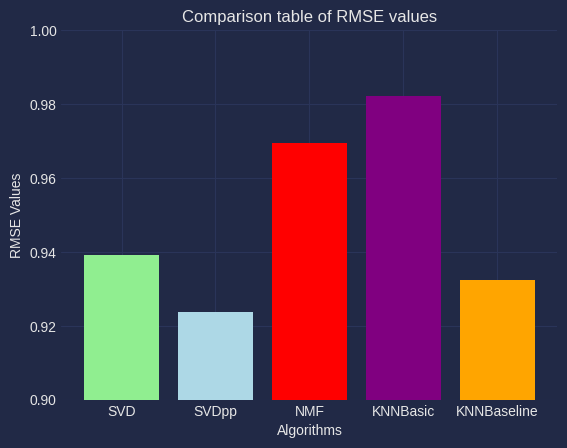

In [9]:
rmse_variables = [rmse_svd, rmse_svdpp, rmse_nmf, rmse_knnbasic, rmse_knnbaseline]
algos = ["SVD", "SVDpp", "NMF", "KNNBasic", "KNNBaseline"]
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.bar(algos, rmse_variables, color=['lightgreen', 'lightblue', 'red', 'purple', 'orange'])
plt.title("Comparison table of RMSE values")
plt.xlabel("Algorithms")
plt.ylabel("RMSE Values")
plt.ylim(0.9, 1.0)
plt.show()

# **Висновок:** під час проведення лабораторної роботи, я отримав досвід у завантаженні та роботі з різноманітними наборами даних та алгоритмами. Ця практика дозволила мені отримати багато нової інформації про різноманітні модулі для роботи з даними та алгоритмами машинного навчання. Крім того, я вивчав та застосовував середньоквадратичну похибку для оцінки точності різних алгоритмів.